#  Capstone Project 1 : Predict Gold Rates - Final Project

Historically, gold had been used as a form of currency in various parts of the world including USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country.

Forecasting rise and fall in the daily gold rates, can help investors to decide when to buy (or sell) the commodity.

We in this project would forecast gold rates using the most comprehensive set of features and would apply various machine learning algorithms for forecasting and compare their results. We also identify the attributes that highly influence the gold rates.

## Below are the steps I would perform to predict the Gold Rates using Python Libraries

1. Fetching the Gold Rates Data.

2. Analyze and describe the Data.

3. Data Wrangling

4. Exploratory Data Analysis

5. Finalizing the indicators variables and the Dataset.

6. Final problem statement.

7. Normalizing the data 

8. Test Train Split Data

9. Building Models

10. Compare the model performance Parameters.

11. Final Project report.

### Necessary Imports

In [1]:
import numpy as np
import os
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

## 1. Fetching the Gold Rates Data.

Obtained the Dataset from Quandl.com (https://www.quandl.com/)
, gold price dataset for a stock market analysis.

Contains Gold rates from 01-12-2009 to 06-02-2017 (dd-mm-yyyy)

- Create Pandas Dataframe with relavant index.
- Describe the Data
- Understand the Datset

In [2]:
dataFile = "Data/GoldPriceData.csv"

goldRateDf = pd.read_csv(dataFile, index_col='Date',parse_dates=True,na_values=['null'],infer_datetime_format=True)
goldRateDf.sort_index(inplace=True)

print("Start 5 records : ")
goldRateDf.head()

Start 5 records : 


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2009-12-01,36.00,50.00,36.0,50.00,49.767758,30141.0,55.0,1500050.0,29000.0,96.21,14.00,14.0
2009-12-02,60.00,60.00,60.0,60.00,60.000000,250.0,3.0,15000.0,250.0,100.00,0.00,0.0
2009-12-03,72.00,72.00,65.2,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.2
2009-12-04,84.95,84.95,66.3,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.0
2009-12-07,65.55,71.00,57.6,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.3


In [3]:
goldRateDf.columns

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

In [4]:
print("Last 5 records : ")
goldRateDf.tail()

Last 5 records : 


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00
2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03


In [5]:
#goldRateDf.dtypes
print(goldRateDf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1660 entries, 2009-12-01 to 2017-02-06
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       1660 non-null   float64
 1   High                       1660 non-null   float64
 2   Low                        1660 non-null   float64
 3   Close                      1660 non-null   float64
 4   WAP                        1660 non-null   float64
 5   No. of Shares              1660 non-null   float64
 6   No. of Trades              1660 non-null   float64
 7   Total Turnover             1660 non-null   float64
 8   Deliverable Quantity       1660 non-null   float64
 9   % Deli. Qty to Traded Qty  1660 non-null   float64
 10  Spread H-L                 1660 non-null   float64
 11  Spread C-O                 1660 non-null   float64
dtypes: float64(12)
memory usage: 168.6 KB
None


In [6]:
goldRateDf.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000
mean,11.834367,12.174048,11.221578,11.673934,11.688802,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434
std,17.169590,17.704607,16.143363,16.837100,16.920058,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787
min,0.500000,0.520000,0.500000,0.520000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,1.350000,1.380000,1.320000,1.350000,1.336219,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000
50%,5.255000,5.380000,4.950000,5.085000,5.119729,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000
75%,11.392500,11.940000,11.250000,11.377500,11.451724,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000
max,84.950000,84.950000,71.500000,74.550000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000


## 3. Data Wrangling

- Verify the Data Columns
- Create Pandas Dataframe with relavant index.
- Check for missing values
- Consistent Coloumns names
- Verify If any special characters used in coloumn Names

In [7]:
# Check if any missing values.
goldRateDf.isnull().values.any()
#goldRateDf.isna().sum()

False

In [8]:
# columns contain Special Characters and spaces
columns_modified = ['Open', 'High', 'Low', 'Close', 'WAP', 'No_of_Shares', 'No_of_Trades',
       'Total_Turnover', 'Deliverable_Quantity', 'Pct_Deli_Qty_to_Traded_Qty',
       'Spread_H-L', 'Spread_C-O']
goldRateDf.columns = columns_modified

goldRateDf.reindex()

,Open,High,Low,Close,WAP,No_of_Shares,No_of_Trades,Total_Turnover,Deliverable_Quantity,Pct_Deli_Qty_to_Traded_Qty,Spread_H-L,Spread_C-O
Date,,,,,,,,,,,,
2009-12-01,36.00,50.00,36.00,50.00,49.767758,30141.0,55.0,1500050.0,29000.0,96.21,14.00,14.00
2009-12-02,60.00,60.00,60.00,60.00,60.000000,250.0,3.0,15000.0,250.0,100.00,0.00,0.00
2009-12-03,72.00,72.00,65.20,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.20
2009-12-04,84.95,84.95,66.30,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.00
2009-12-07,65.55,71.00,57.60,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,0.91,0.91,0.91,0.91,0.910000,400.0,1.0,364.0,400.0,100.00,0.00,0.00
2017-01-31,0.87,0.87,0.87,0.87,0.870000,1050.0,2.0,913.0,1050.0,100.00,0.00,0.00
2017-02-02,0.83,0.83,0.83,0.83,0.830000,75.0,1.0,62.0,75.0,100.00,0.00,0.00


In [9]:
# unique
goldRateDf.nunique()

Open                           781
High                           794
Low                            786
Close                          840
WAP                           1427
No_of_Shares                  1518
No_of_Trades                   419
Total_Turnover                1626
Deliverable_Quantity          1513
Pct_Deli_Qty_to_Traded_Qty     677
Spread_H-L                     251
Spread_C-O                     259
dtype: int64

## 4. Exploratory Data Analysis

- Create various vistualization plots , scatter plots, box plots , line plots
- Study corelation between the features

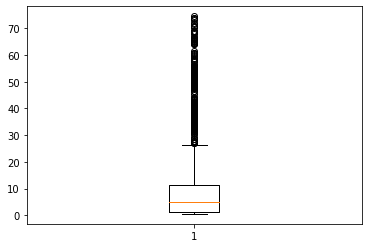

In [10]:
close = goldRateDf['Close']
_ = plt.boxplot(close)
_=plt.show()

Above box plot indicates that there are too many outliers. Need to normalize the data ?

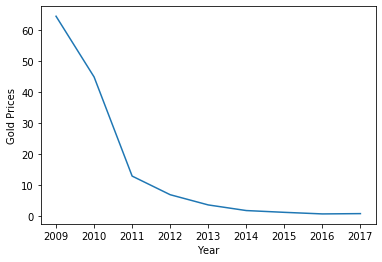

In [11]:
years = range(2009,2018,1)
gold_prices = goldRateDf.groupby(pd.to_datetime(goldRateDf.index).year)['Close'].mean()

_ = plt.plot(years , gold_prices)
_ = plt.xlabel("Year")
_ = plt.ylabel("Gold Prices")
_ = plt.show()

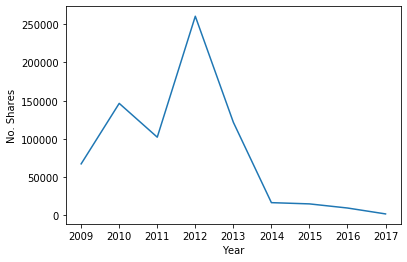

In [12]:
years = range(2009,2018,1)
no_of_Shares = goldRateDf.groupby(pd.to_datetime(goldRateDf.index).year)['No_of_Shares'].mean()

_ = plt.plot(years , no_of_Shares)
_ = plt.xlabel("Year")
_ = plt.ylabel("No. Shares")
_ = plt.show()

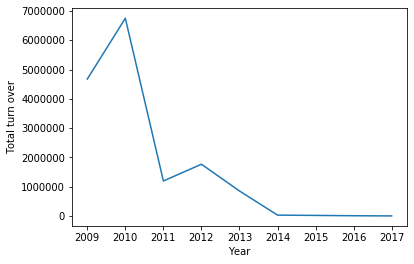

In [13]:
years = range(2009,2018,1)
total_Turnover = goldRateDf.groupby(pd.to_datetime(goldRateDf.index).year)['Total_Turnover'].mean()

_ = plt.plot(years , total_Turnover)
_ = plt.xlabel("Year")
_ = plt.ylabel("Total turn over")
_ = plt.show()

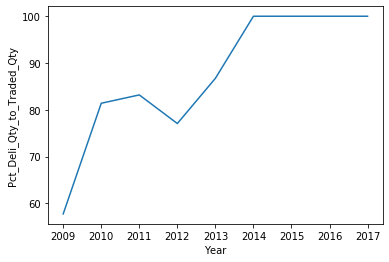

In [14]:
years = range(2009,2018,1)
pct_Deli_Qty_to_Traded_Qty = goldRateDf.groupby(pd.to_datetime(goldRateDf.index).year)['Pct_Deli_Qty_to_Traded_Qty'].mean()

_ = plt.plot(years , pct_Deli_Qty_to_Traded_Qty)
_ = plt.xlabel("Year")
_ = plt.ylabel("Pct_Deli_Qty_to_Traded_Qty")
_ = plt.show()

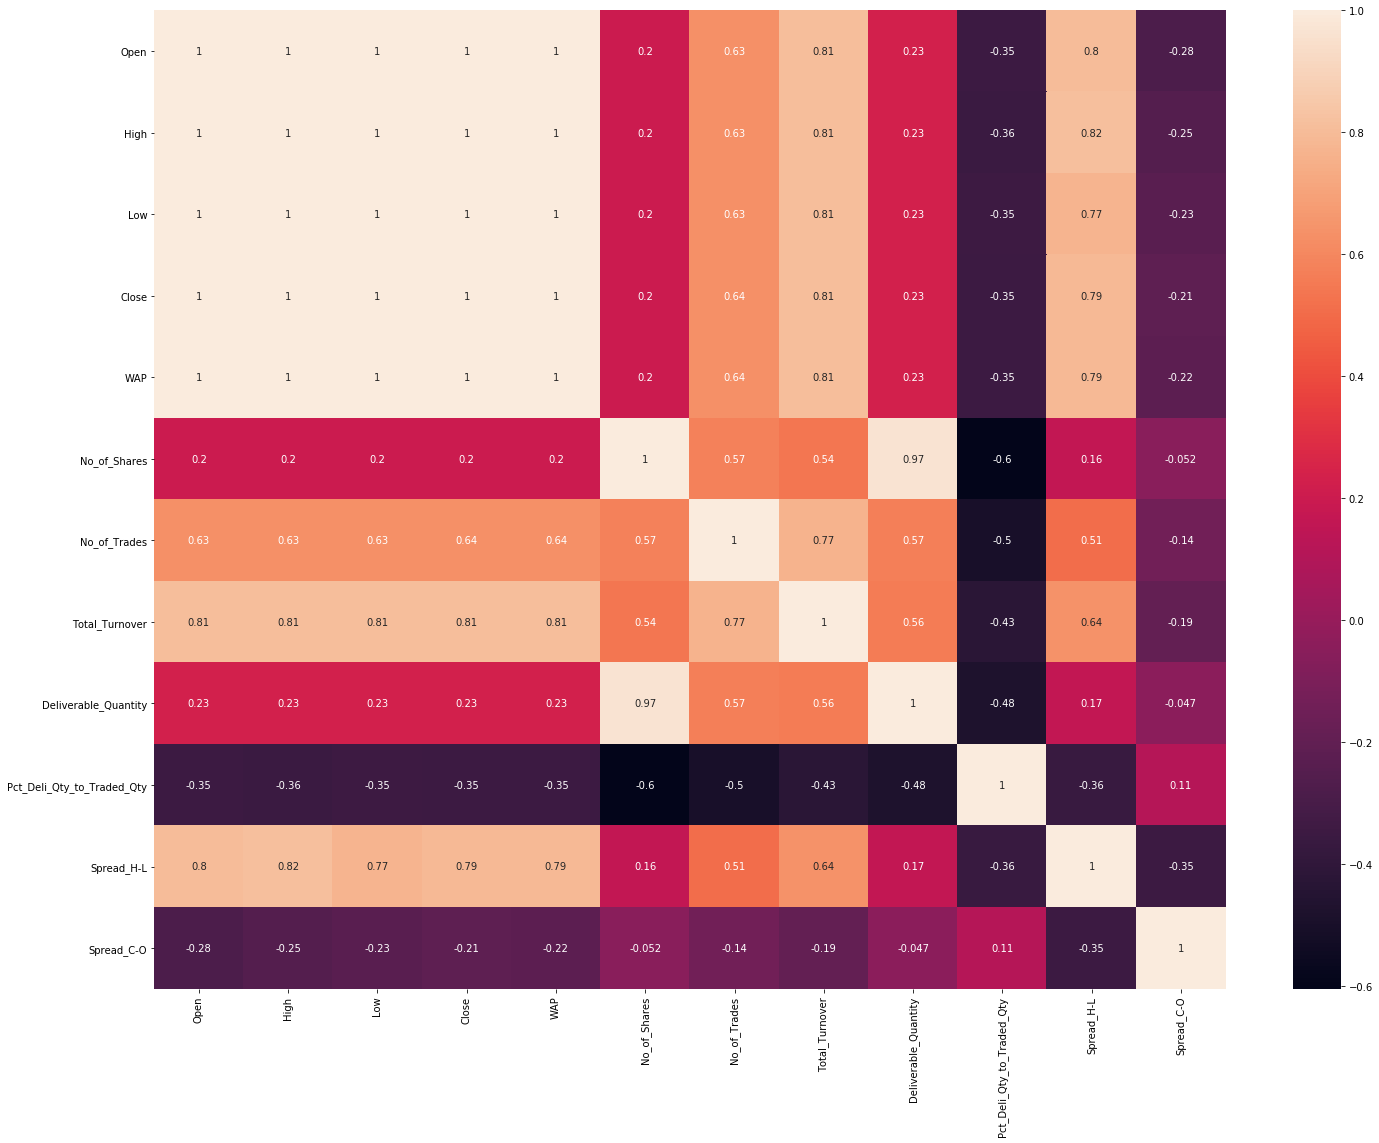

In [15]:
plt.figure(figsize=(24,18)) 
sns.heatmap(goldRateDf.corr(), annot=True)

In [16]:
corr_matrix=goldRateDf.corr()
coef=corr_matrix["Close"].sort_values(ascending=False)

In [17]:
# Positively Correlated Values
pos_corr=coef[coef>0]
pos_corr

Close                   1.000000
WAP                     0.999739
Low                     0.998892
High                    0.998452
Open                    0.997073
Total_Turnover          0.811758
Spread_H-L              0.791669
No_of_Trades            0.636125
Deliverable_Quantity    0.234558
No_of_Shares            0.203406
Name: Close, dtype: float64

In [18]:
# Negetively Correlated Values
neg_corr=coef[coef<0]
neg_corr

Spread_C-O                   -0.210180
Pct_Deli_Qty_to_Traded_Qty   -0.349841
Name: Close, dtype: float64

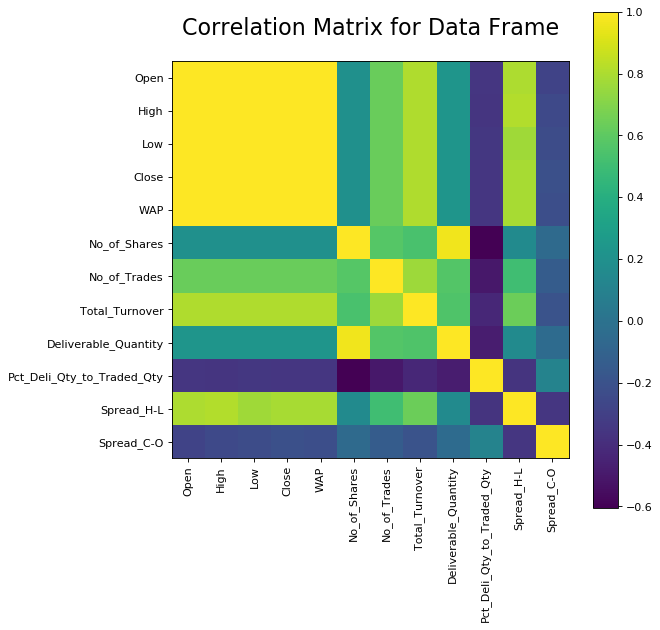

In [19]:
# Correlation matrix - created before i came to know about sns heat map
def plotCorrelationMatrix(df, graphWidth):
    filename = "Data Frame"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=20)
    plt.show()
    

plotCorrelationMatrix(goldRateDf, 8)

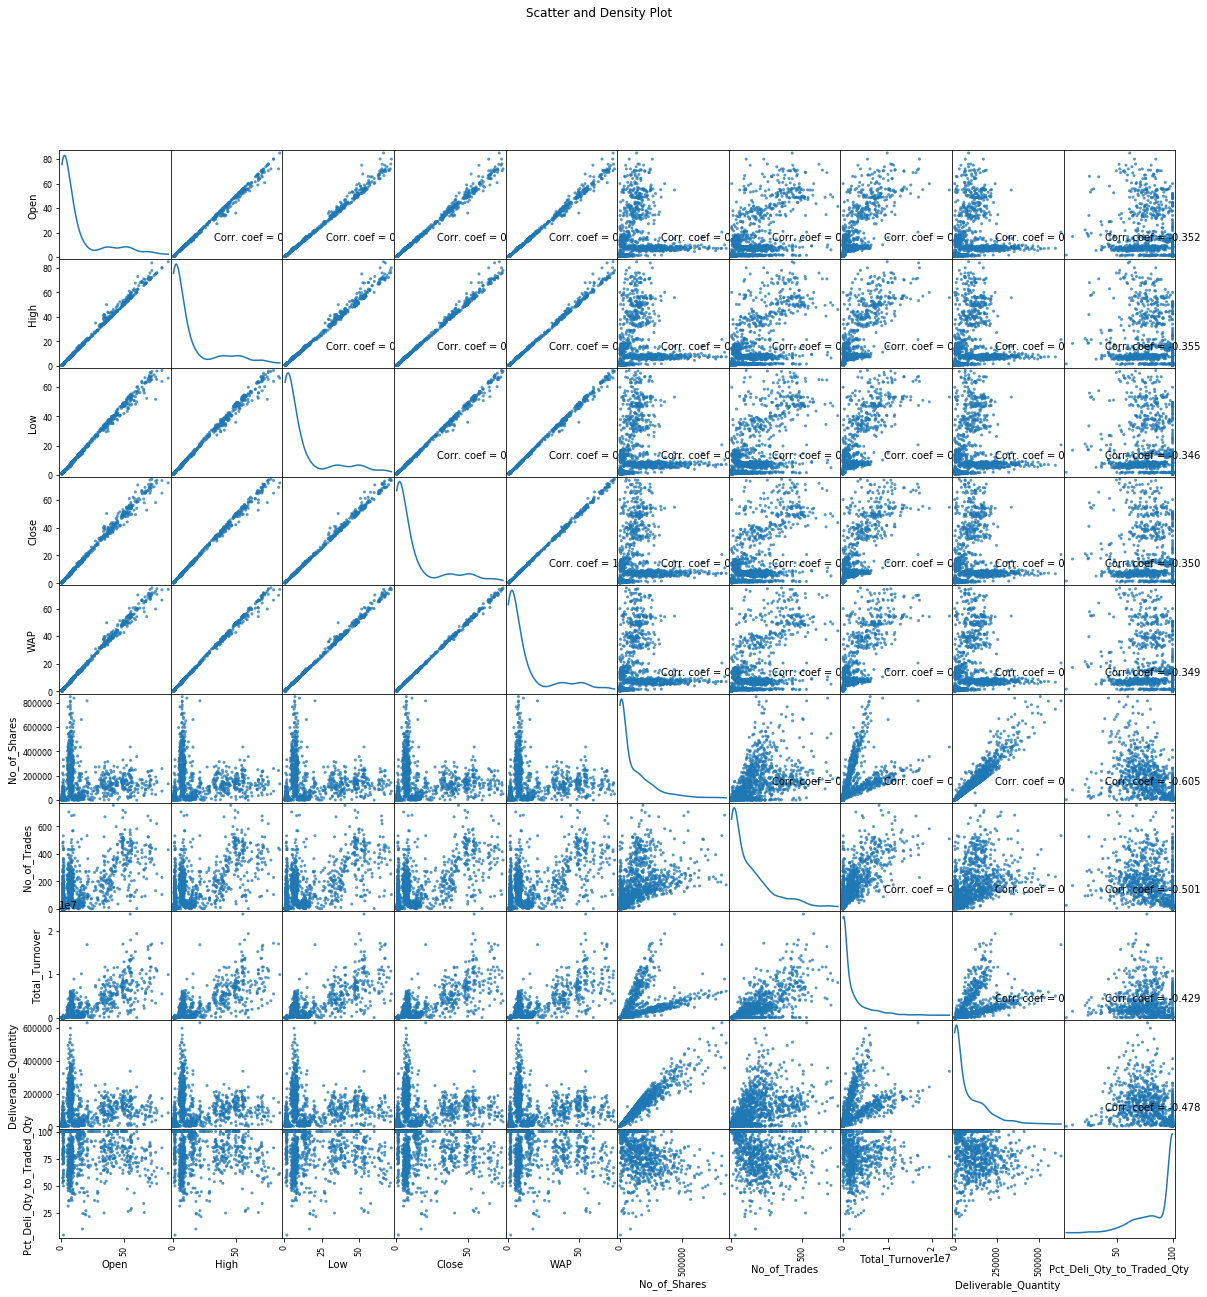

In [20]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(goldRateDf, 20, 10)

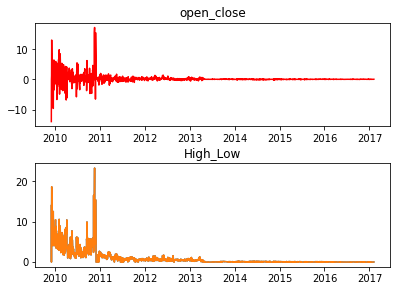

In [21]:
# visualize the diffrence between open and close , High and Low

open_close = goldRateDf['Open'] - goldRateDf['Close']
high_low = goldRateDf['High'] - goldRateDf['Low']

plt.subplot(2,1,1)
plt.tight_layout(pad=2)

_ = plt.plot(goldRateDf.index.values,open_close, color='red')
_ = plt.title("open_close")

_ = plt.subplot(2,1,2)
_ = plt.plot(goldRateDf.index.values,high_low)
_ = plt.plot(goldRateDf.index.values,goldRateDf['Spread_H-L'])
_ = plt.title("High_Low")

_ = plt.show()

## 5. Finalizing the indicators variables and the Dataset.

 In this step I would segregate feature and target variables.

 - Target Variable : weighted average price (WAP).
 - Prediction Variables : 
     ['Open', 'High', 'Low', 'Close', 'No_of_Shares', 'No_of_Trades','Total_Turnover', 'Deliverable_Quantity',    'Pct_Deli_Qty_to_Traded_Qty','Spread_H-L', 'Spread_C-O']

In [22]:
# Target column
target_wap = pd.DataFrame(goldRateDf['WAP'])

# Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Close', 'No_of_Shares', 'No_of_Trades',
       'Total_Turnover', 'Deliverable_Quantity', 'Pct_Deli_Qty_to_Traded_Qty',
       'Spread_H-L', 'Spread_C-O']


## 6. Final Problem Statement

<B> As per the correlation plot above </B> :

1. Looks like the coloumns - 'Open', 'High', 'Low', 'Close', 'WAP' are redundant.

2. Strong positve corelation between - Total_Turnover  vs gold prices, Spread_H-L vs gold prices.

3. Strong negetive correlation between - Pct_Deli_Qty_to_Traded_Qty vs gold prices.

<B> Project statement </B>

Looks Regression (Linear) models are best suitable for prediction of gold rates. Will Try to fit the data on various other models and verify the performance.


## 7. Normalizing the data
In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

- Reason : There is lot of variance in the data,  hence predicting the data as is , would not be possible. Hence I do normalization so that all values are on the same range.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(goldRateDf[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=goldRateDf.index)
feature_minmax_transform.head()

,Open,High,Low,Close,No_of_Shares,No_of_Trades,Total_Turnover,Deliverable_Quantity,Pct_Deli_Qty_to_Traded_Qty,Spread_H-L,Spread_C-O
Date,,,,,,,,,,,
2009-12-01,0.420367,0.586048,0.500000,0.668378,0.035486,0.071904,0.062947,0.045930,0.960206,0.600858,1.000000
2009-12-02,0.704559,0.704489,0.838028,0.803458,0.000293,0.002663,0.000629,0.000394,1.000000,0.000000,0.550562
2009-12-03,0.846655,0.846619,0.911268,0.949345,0.099548,0.488682,0.253577,0.097683,0.715981,0.291845,0.512039
2009-12-04,1.000000,1.000000,0.926761,0.964879,0.157556,0.571238,0.415093,0.130498,0.596493,0.800429,0.133226
2009-12-07,0.770278,0.834774,0.804225,0.874375,0.050321,0.379494,0.114915,0.022875,0.304809,0.575107,0.540931


In [24]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_wap.shape)

# Shift target array because we want to predict the n + 1 day value

target_wap = target_wap.shift(-1)
validation_y = target_wap[-90:-1]
target_wap = target_wap[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_wap.shape)
display(target_wap.tail())

Shape of features :  (1660, 11)
Shape of target :  (1660, 1)


,Open,High,Low,Close,No_of_Shares,No_of_Trades,Total_Turnover,Deliverable_Quantity,Pct_Deli_Qty_to_Traded_Qty,Spread_H-L,Spread_C-O
Date,,,,,,,,,,,
2017-01-24,0.004855,0.004619,0.005634,0.005268,0.004275,0.006658,0.000139,0.005751,1.0,0.000429,0.550562
2017-01-25,0.004855,0.004619,0.005775,0.005268,0.000470,0.000000,0.000015,0.000632,1.0,0.000000,0.550562
2017-01-31,0.004381,0.004145,0.005211,0.004728,0.001235,0.001332,0.000038,0.001661,1.0,0.000000,0.550562
2017-02-02,0.003908,0.003672,0.004648,0.004187,0.000087,0.000000,0.000003,0.000117,1.0,0.000000,0.550562
2017-02-03,0.003434,0.003198,0.004085,0.003647,0.000364,0.003995,0.000010,0.000489,1.0,0.000000,0.550562


,WAP
Date,
2017-01-24,0.91
2017-01-25,0.87
2017-01-31,0.83
2017-02-02,0.79
2017-02-03,0.79



 -----After process------ 

Shape of features :  (1570, 11)
Shape of target :  (1570, 1)


,WAP
Date,
2016-07-25,0.51
2016-07-26,0.56
2016-07-29,0.58
2016-08-01,0.60
2016-08-02,0.63


## 8. Test Train Split Data

In time series machine learning analysis, our observations are not independent, and thus we cannot split the data randomly as we do in non-time-series analysis. Instead, we usually split observations along with the sequences.
We split data into training set and test set in everyday machine learning analyses, and oftentimes we use scikit-learn’s random splitting function.

"from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) "

In time series analysis, however, we are not able to use this simple command, since observations in our time series datasets are not independent.

In [25]:
ts_split= TimeSeriesSplit(n_splits=10)
ts_split

for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_wap[:len(train_index)].values.ravel(), target_wap[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [26]:
X_train.shape

(1428, 11)

In [27]:
X_test.shape

(142, 11)

In [28]:
y_train.shape

(1428,)

In [29]:
y_test.shape

(142,)


## 9. Building Models

Here we want to predict the future rate (This is Not a classicfication problem) we should use regression model.

- Use below regression models, fit traning data created in above step.
- Predict the Test data created.
- Print the model statistics like scores, R^2.
- Also visualize the predictions made compared to actual test data.

Models :  
    1. Linear Regression 
    2. Ridge Regession
    3. Lasso Regression
    4. ElasticNet
    5. Decision Tree Regression
    6. Random Forest Regression
    7. Bayesian Ridge

In [30]:
# Common Method to print prediction scores and plot prediction graph.

import matplotlib.dates as mdates

model_perfromance_map = dict()

def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)
    
    model_perfromance_map[model_name] = (RSME_score,R2_score)
    
    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

### 1.Linear Regression

RMSE:  0.059073883206860925
R2 score:  0.5662242210737354


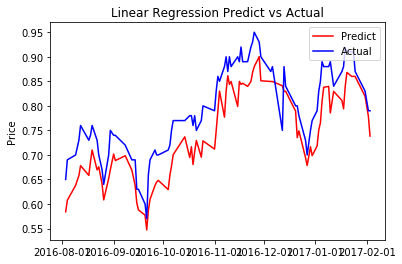

In [31]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

validate_result(reg_all,"Linear Regression")

In [32]:
# Cross Validation
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_train,y_train,cv=5 )

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.97675817 0.99144387 0.98597157 0.95944881 0.93025461]
Average 5-Fold CV Score: 0.9687754035485373


### 2. Ridge Regession

RMSE:  0.05709879424002456
R2 score:  0.5947452323234463


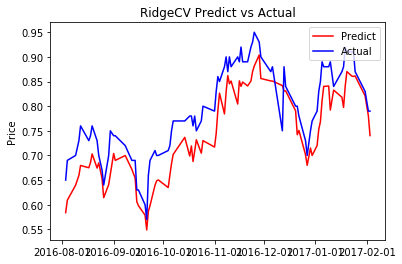

In [33]:
from sklearn.linear_model import RidgeCV

ridge_clf = RidgeCV(gcv_mode='auto')

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')

### 3. Lasso Regression

RMSE:  0.04507395916688197
R2 score:  0.7474626190592819


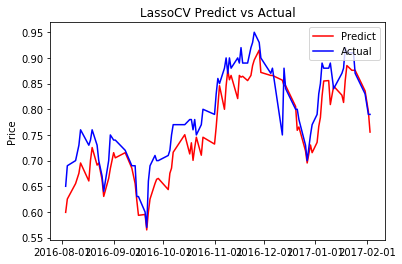

In [34]:
from sklearn.linear_model import LassoCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')

### 4. ElasticNet

RMSE:  3.002733598625339
R2 score:  -1119.747722982516


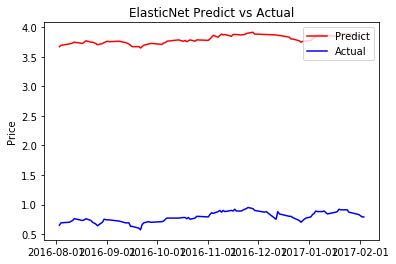

In [35]:
# Create the hyperparameter grid
l1_space = np.linspace(1, 1, 80)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
_ = gm_cv.fit(X_train,y_train)

validate_result(gm_cv,'ElasticNet')

### 5.  Decision Tree Regression

RMSE:  0.2451633477369745
R2 score:  -6.4711136752953475


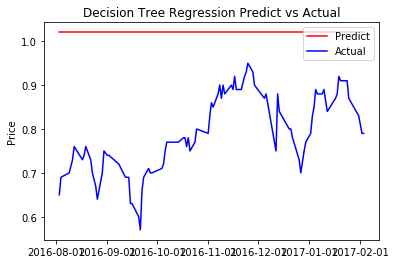

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

### 6. Random Forest Regression

RMSE:  0.2588250769365693
R2 score:  -7.326969267566607


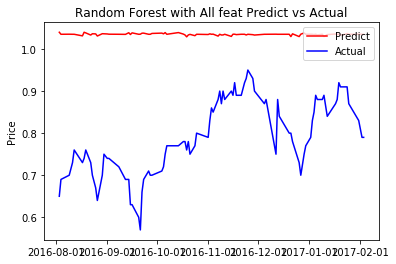

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

### 7. Bayesian Ridge

RMSE:  0.059243702181965376
R2 score:  0.5637266964899874


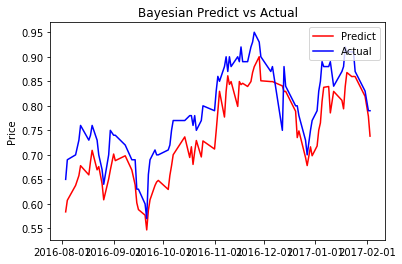

In [38]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')

## 10.Compare the model performance Parameters.

In [39]:
models = []
RMSE = []
R2 = []

def print_model_metrics(dMap) :
    for key,value in dMap.items():
        print("Model : {} ".format(key) + " - RMSE : {} ".format(value[0]) + ", R^2 : {} ".format(value[1]))
        models.append(key)
        RMSE.append(value[0])
        R2.append(value[1])
        
print_model_metrics(model_perfromance_map)

Model : Linear Regression  - RMSE : 0.059073883206860925 , R^2 : 0.5662242210737354 
Model : RidgeCV  - RMSE : 0.05709879424002456 , R^2 : 0.5947452323234463 
Model : LassoCV  - RMSE : 0.04507395916688197 , R^2 : 0.7474626190592819 
Model : ElasticNet  - RMSE : 3.002733598625339 , R^2 : -1119.747722982516 
Model : Decision Tree Regression  - RMSE : 0.2451633477369745 , R^2 : -6.4711136752953475 
Model : Random Forest with All feat  - RMSE : 0.2588250769365693 , R^2 : -7.326969267566607 
Model : Bayesian  - RMSE : 0.059243702181965376 , R^2 : 0.5637266964899874 


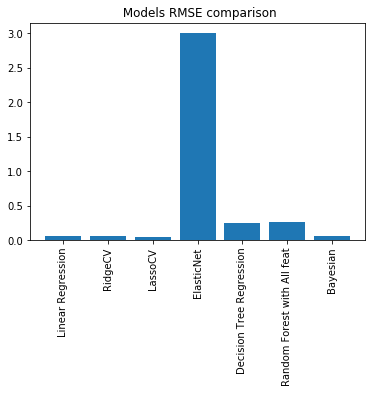

In [40]:
_ = plt.bar(models,RMSE)
_ = plt.xticks(range(len(models)), models, rotation=90)
_ = plt.title(" Models RMSE comparison")
_ = plt.show()

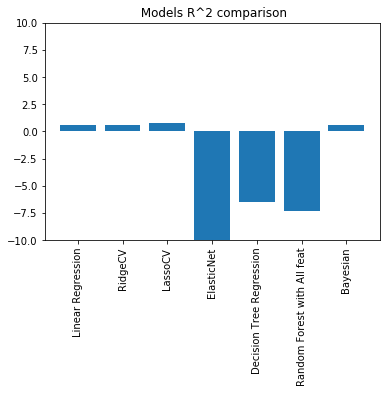

In [41]:
_ = plt.bar(models,R2)
_ = plt.xticks(range(len(models)), models, rotation=90)
_ = plt.ylim(-10,10)
_ = plt.title(" Models R^2 comparison")
_ = plt.show()

As we have seen from the above plot 3 Feature selected models performs better in RMSE error reduction. 
Linear Regression, Lasso cv and Bayesian Ridge performs better over other models.

## 11. Final Reports

Looks After performing analysis , Bayesian Regression Model seems to best perfroming on this prediction problem.
The R^2 and RMSE are lowest for Bayesian Regression , out of all other models used for prediction.

Further steps to improve the model performance : 

1. Use Bayesian Regression model and run the model various others spilts of the data.

2. Run Model multiple times using diffrent ratios of the split (70:30 , 60:40 etc)

3. Ensamble the above best performing solutions